<a href="https://colab.research.google.com/github/fendy07/FMNIST-DeepLearning/blob/master/ML_01_FendyHendriyanto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1) Exploring The Dataset
## 1.1) Importing Libraries

Memasukan Library yang akan digunakan dalam proses Deep Learning mulai dari memasukan data sampai proses evaluasi model data.

In [2]:
# Ignore warnings :
import warnings
warnings.filterwarnings('ignore')

# Handle table-like data and matrices :
import numpy as np
import pandas as pd
import math 
import itertools

# Modelling Helpers :
from sklearn.preprocessing import Normalizer, scale
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

#preprocessing :
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder

#evaluation metrics :
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score  

# Deep Learning Libraries
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D, BatchNormalization
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau, LearningRateScheduler
from tensorflow.keras.utils import to_categorical

# Visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

# Configure visualisations
%matplotlib inline
mpl.style.use( 'ggplot' )
plt.style.use('fivethirtyeight')
sns.set(context="notebook", palette="dark", style = 'whitegrid' , color_codes=True)

## 1.2) Mengekstraksi Dataset

a. Menyambungkan data dari Google Drive

b. Memasukan data csv dengan Pandas


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [4]:
mnist_train = pd.read_csv('drive/My Drive/Project/Data/fashion-mnist_train.csv')
mnist_train

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,0,0,105,92,101,107,100,132,0,0,2,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,150,...,211,220,214,74,0,255,222,128,0,0,0,0,0,0,0,0,0,44,12,0,0,40,134,162,191,214,163,146,165,79,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,0,114,183,112,55,23,72,102,165,160,28,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,24,188,163,93,...,171,249,207,197,202,45,0,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,22,21,25,69,52,45,74,39,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,0,0,0,46,0,21,68,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25,187,189,...,230,237,229,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,68,116,112,136,147,144,121,102,63,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,0,83,155,136,116,148,110,118,67,32,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,118,...,199,165,108,108,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,32,159,6,91,0,0,85,159,0,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,0,1,0,0,87,114,77,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,...,228,229,231,231,218,230,255,0,0,0,0,0,0,0,0,0,0,0,116,140,147,166,176,174,173,173,174,173,177,164,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [5]:
mnist_test = pd.read_csv('drive/My Drive/Project/Data/fashion-mnist_test.csv')
mnist_test

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,0,0,34,29,7,0,11,24,0,0,3,3,1,0,1,1,0,0,0,0,0,4,0,0,1,0,0,0,0,0,...,242,245,224,245,234,0,3,0,0,0,0,0,0,0,0,0,0,0,0,37,69,94,123,127,138,138,142,145,135,125,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,209,190,181,150,170,193,180,219,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,24,...,248,238,80,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,174,233,155,0,65,235,216,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,17,0,0,0,0,0,0,0,0,12,94,68,14,0,0,0,0,0,0,0,0,0,0,0,38,106,94,89,94,68,...,0,0,0,0,0,0,87,12,26,0,0,0,0,0,0,0,46,50,29,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,161,212,138,150,169,164,176,202,255,183,26,0,0,0,0,0,0,0,0,0,0,0,1,0,0,129,221,255,255,215,...,255,255,254,252,255,101,196,254,252,100,0,0,0,0,0,168,232,225,0,41,172,147,148,153,155,146,137,141,143,137,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,0,37,0,0,0,0,0,0,17,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,21,204,235,...,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,69,0,2,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,37,93,72,58,55,63,66,89,159,120,20,0,0,0,0,1,0,0,0,0,0,0,1,0,0,22,67,125,151,168,...,112,115,117,117,113,146,41,0,3,0,0,0,0,0,0,0,1,0,1,76,54,55,51,53,53,55,53,44,38,37,32,23,14,20,0,0,1,0,0,0
9996,6,0,0,0,0,0,0,0,0,0,0,0,76,36,110,170,78,136,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,68,...,94,84,70,44,0,36,152,65,110,0,0,0,0,0,0,0,21,57,89,7,0,0,0,0,0,0,0,0,0,0,0,0,0,2,52,23,28,0,0,0
9997,8,0,0,0,0,0,0,0,0,0,0,1,3,0,14,152,184,158,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,...,219,223,226,239,247,241,224,213,144,0,0,0,0,0,0,1,0,44,232,199,200,190,180,179,185,189,191,185,179,178,175,172,172,182,199,222,42,0,1,0
9998,8,0,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,131,192,79,0,0,0,0,...,13,26,17,8,0,0,0,0,0,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [6]:
feat_list = list(mnist_train.columns.values)

for feat in feat_list:
  print(feat, ': ',sum(pd.isnull(mnist_train[feat])))

label :  0
pixel1 :  0
pixel2 :  0
pixel3 :  0
pixel4 :  0
pixel5 :  0
pixel6 :  0
pixel7 :  0
pixel8 :  0
pixel9 :  0
pixel10 :  0
pixel11 :  0
pixel12 :  0
pixel13 :  0
pixel14 :  0
pixel15 :  0
pixel16 :  0
pixel17 :  0
pixel18 :  0
pixel19 :  0
pixel20 :  0
pixel21 :  0
pixel22 :  0
pixel23 :  0
pixel24 :  0
pixel25 :  0
pixel26 :  0
pixel27 :  0
pixel28 :  0
pixel29 :  0
pixel30 :  0
pixel31 :  0
pixel32 :  0
pixel33 :  0
pixel34 :  0
pixel35 :  0
pixel36 :  0
pixel37 :  0
pixel38 :  0
pixel39 :  0
pixel40 :  0
pixel41 :  0
pixel42 :  0
pixel43 :  0
pixel44 :  0
pixel45 :  0
pixel46 :  0
pixel47 :  0
pixel48 :  0
pixel49 :  0
pixel50 :  0
pixel51 :  0
pixel52 :  0
pixel53 :  0
pixel54 :  0
pixel55 :  0
pixel56 :  0
pixel57 :  0
pixel58 :  0
pixel59 :  0
pixel60 :  0
pixel61 :  0
pixel62 :  0
pixel63 :  0
pixel64 :  0
pixel65 :  0
pixel66 :  0
pixel67 :  0
pixel68 :  0
pixel69 :  0
pixel70 :  0
pixel71 :  0
pixel72 :  0
pixel73 :  0
pixel74 :  0
pixel75 :  0
pixel76 :  0
pixel77 : 

In [7]:
feat_list = list(mnist_test.columns.values)

for feat in feat_list:
  print(feat, ': ',sum(pd.isnull(mnist_test[feat])))

label :  0
pixel1 :  0
pixel2 :  0
pixel3 :  0
pixel4 :  0
pixel5 :  0
pixel6 :  0
pixel7 :  0
pixel8 :  0
pixel9 :  0
pixel10 :  0
pixel11 :  0
pixel12 :  0
pixel13 :  0
pixel14 :  0
pixel15 :  0
pixel16 :  0
pixel17 :  0
pixel18 :  0
pixel19 :  0
pixel20 :  0
pixel21 :  0
pixel22 :  0
pixel23 :  0
pixel24 :  0
pixel25 :  0
pixel26 :  0
pixel27 :  0
pixel28 :  0
pixel29 :  0
pixel30 :  0
pixel31 :  0
pixel32 :  0
pixel33 :  0
pixel34 :  0
pixel35 :  0
pixel36 :  0
pixel37 :  0
pixel38 :  0
pixel39 :  0
pixel40 :  0
pixel41 :  0
pixel42 :  0
pixel43 :  0
pixel44 :  0
pixel45 :  0
pixel46 :  0
pixel47 :  0
pixel48 :  0
pixel49 :  0
pixel50 :  0
pixel51 :  0
pixel52 :  0
pixel53 :  0
pixel54 :  0
pixel55 :  0
pixel56 :  0
pixel57 :  0
pixel58 :  0
pixel59 :  0
pixel60 :  0
pixel61 :  0
pixel62 :  0
pixel63 :  0
pixel64 :  0
pixel65 :  0
pixel66 :  0
pixel67 :  0
pixel68 :  0
pixel69 :  0
pixel70 :  0
pixel71 :  0
pixel72 :  0
pixel73 :  0
pixel74 :  0
pixel75 :  0
pixel76 :  0
pixel77 : 

## 1.3) Combine Dataset

Kombinasi data yang awalnya terpisah dari data train dan data test sehingga yang awalnya berjumlah 60000 pada data train dan 10000 pada data test. Sehingga, keseluruhan data berjumlah 70000 dataset. 

In [8]:
combine = [mnist_train, mnist_test]
fmnist = pd.concat(combine)

## 1.4) Check Data NaN

Memeriksa data NaN secara keseluruhan 

In [9]:
fmnist.isnull().any().sum()

0

# 2) Visualizing the Dataset
## 2.1)Melihat persebaran data dan Visualisasi Dataset

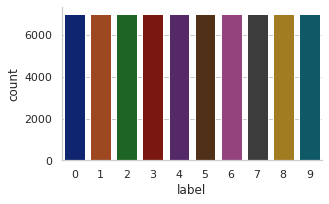

In [10]:
sns.factorplot(x='label', data=fmnist, kind='count', size=3, aspect= 1.5)

## 2.2) Melihat Bentuk data beserta label

In [11]:
x_data = fmnist.copy()

y_data = x_data.pop('label').values

x_data = np.array(x_data).reshape(-1, 28, 28) / 255.0

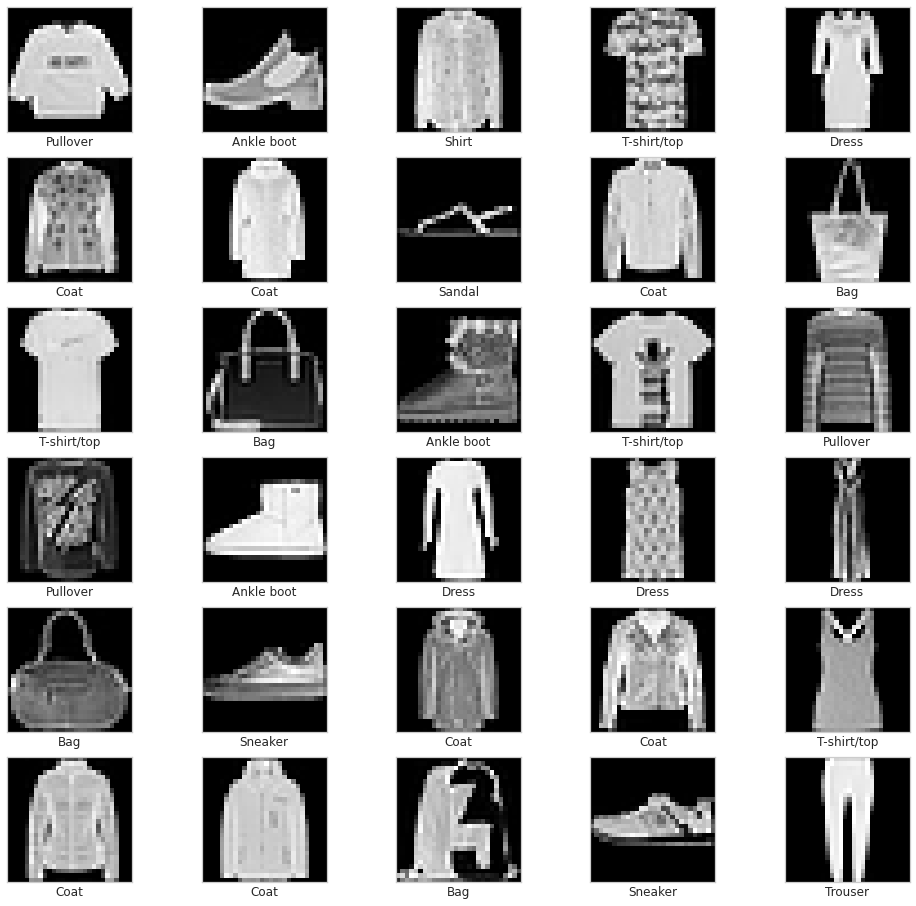

In [12]:
labeldict = {
    0: 'T-shirt/top',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle boot'
}

plt.figure(figsize=(15, 15))
for i in range(30):
  plt.subplot(6,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(x_data[i], cmap='gray')
  plt.xlabel(labeldict[y_data[i]])
plt.show()

# 3) Data PreProcessing
## 3.1) Membagi data menjadi 2 bagian yaitu data train dan data test

In [13]:
data_fmnist = fmnist.copy()
x_fmnist = data_fmnist.drop(['label'], axis=1).values
y_fmnist = data_fmnist['label'].values

In [14]:
pers_test = 0.3
x_train, x_test, y_train, y_test = train_test_split(x_fmnist, y_fmnist, test_size= pers_test, random_state=25)

Memeriksa jumlah data train dan data test

In [15]:
print("Data training (image) shape: {shape}".format(shape=x_train.shape))
print("Data testing (image) shape: {shape}".format(shape=x_test.shape))
print("Data training (label) shape: {shape}".format(shape=y_train.shape))
print("Data testing (label) shape: {shape}".format(shape=y_test.shape))

Data training (image) shape: (49000, 784)
Data testing (image) shape: (21000, 784)
Data training (label) shape: (49000,)
Data testing (label) shape: (21000,)


## 3.2) Membentuk ulang data citra 

Data Citra diubah menjadi ukuran 28x28 pixel


In [16]:
#Reshape the Image
x_n = 28
x_train_pic = x_train.reshape((-1, x_n, x_n, 1))
x_test_pic = x_test.reshape((-1, x_n, x_n, 1))
print( x_train_pic.shape, x_test_pic.shape)

(49000, 28, 28, 1) (21000, 28, 28, 1)


## 3.3) Normalisasi Data

Nilai pixel disimpan dalam bentuk angka (Integer) dalam nilai antara  0 sampai 255, kisaran yang dapat ditawarkan oleh single 8-bit byte.  Dibutuhkan algoritma optimasi bekerja cepat. Disini, Menggunakan Zero Mean dan Variance Unit. 

In [17]:
# Normalisasi 
x_train_pic = x_train_pic.astype("float32")/255
x_test_pic = x_test_pic.astype("float32")/255

## 3.4) One Hot Encoding
Label diberikan sebagai bilangan bulat antara 0-9. Kita perlu one hot encode.

Misalnya, 

8 [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

5 [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]

In [18]:
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)
y_test

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

# 4) Melatih sebuah model Convolutional Neural Network
## 4.1) Membangun sebuah Model ConvNet
Langkah: 

1) Pada awalnya, menggunakan Sequential Keras API yang hanya setumpuk linear lapisan. Kami menambahkan satu lapisan pada satu waktu mulai dari input. 

2) Selanjutnya, menambahkan Lapisan Konvolusional, yang merupakan blok Bangunan dari ConvNets. Lapisan Konvolusional memiliki seperangkat Filter independen yang kedalamannya sama dengan input dan dimensi lain dapat diatur secara manual. Filter-filter ini ketika mengkonvolusi yang berlebihan dari masukan Gambar menghasilkan feature map.

3) Selanjutnya, menambahkan **Pooling Layers**, yang digunakan untuk Pengurangan Dimensi atau DownSampling. Ini digunakan di mana memiliki banyak fitur Input. Ini mengurangi jumlah Parameter dan daya komputasi yang dibutuhkan secara drastis, sehingga mengurangi Overfitting. Lapisan ini bersama dengan lapisan Konvolusional dapat mempelajari lebih banyak fitur Kompleks Gambar

4) Kami menambahkan Normalisasi Batch di mana kami mencapai Zero mean dan Variance one. Ini mengurangi pencilan dan memaksa jaringan untuk mempelajari fitur dengan cara terdistribusi, tidak terlalu bergantung pada Bobot Khusus dan membuat model ini lebih baik.

5) Untuk menghindari Overfitting, kami menambahkan **Dropout**. Ini secara acak turun beberapa persen dari neuron, dan dengan demikian bobot akan diselaraskan kembali. Neuron yang tersisa mempelajari lebih banyak fitur dan ini mengurangi ketergantungan pada salah satu Neuron. DropOut adalah Teknik Regularisasi, yang Menghukum Parameter. Secara umum, kami menetapkan **DropOutRate** antara 0,2 - 0,5.

6) Akhirnya kami menambahkan layer Ratakan untuk memetakan input ke vektor 1D. Kami kemudian menambahkan Layers sepenuhnya terhubung setelah beberapa lapisan convolutional / pooling. Ini menggabungkan semua Fitur dari Lapisan Sebelumnya.

7) Terakhir, kami menambahkan **Layer Output**. Ini memiliki unit yang sama dengan jumlah kelas yang akan diidentifikasi. Di sini, kami menggunakan fungsi 'sigmoid' jika itu adalah Klasifikasi Biner sebaliknya fungsi aktivasi 'softmax' dalam kasus Klasifikasi Multi-Kelas.

In [19]:
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras import Sequential

model = Sequential()

model.add(Conv2D(32, kernel_size=3, padding='same', activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(32, kernel_size=3, padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(rate=0.4))
model.add(Conv2D(64, kernel_size=5, padding='same', activation='relu'))
model.add(Conv2D(64, kernel_size=5, padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides= 2))
model.add(Dropout(rate=0.4))
model.add(Conv2D(128, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(128, kernel_size=3, padding='valid', activation='relu'))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

## 4.2) Compiling the Model

1) Kita perlu menyusun sebuah model. Kita harus menemtukan pengoptimalkan yang diperlukan oleh model. Kami memiliki banyak pilihan seperti Adam, RMSprop dll. 
2) Selanjutnya, kita membutuhkan spesifikasi fungsi Loss untuk Jaringan Syaraf Tiruan yang kita minimalkan. Untuk klasifikasi biner menggunakan "binary_crossentropy" dan untuk klasifikasi multi kelas menggunakan "categorical_crossentropy". 
3) Akhirnya, kita menentukan metrik untuk mengevaluasi model yang kita buat. 

In [20]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

## 4.3) Model Summary

Rangkuman model yang dibuat berisi layer atau lapisan output dan parameter.

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 26, 26, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 64)        51264     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 9, 9, 64)          102464    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 64)          0

## 4.4) Learning Rate Decay


*   Tingkat Pembelajaran harus disesuaikan dengan benar, sehingga tidak terlalu tinggi untuk mengambil langkah yang sangat besar, juga tidak boleh terlalu kecil, yang tidak akan mengubah Bobot dan Bias.

*   Kami akan menggunakan LearningRateScheduler di sini, yang mengambil fungsi peluruhan langkah sebagai argumen dan mengembalikan tingkat pembelajaran yang diperbarui untuk digunakan dalam pengoptimal pada setiap tahap epoch. Pada dasarnya ini menghasilkan tingkat pembelajaran baru di setiap tahap epoch.

In [22]:
# Learning Rate Decay
reduce_lr = LearningRateScheduler(lambda x: 1e-3 * 0.9 ** x)

## 4.5) Data Augmentation

Augmentasi data gambar digunakan untuk memanipulasi data dengan cara merotasi gambar,memperbesar gambar, memotong gambar, membalikan gambar tanpa menghilangkan inti dari data tersebut. 

In [23]:
# Data Augmentation
datagen = ImageDataGenerator(
        rotation_range = 8,       # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2,         # Randomly zoom image 
        shear_range = 0.3,        # shear angle in counter-clockwise direction in degrees  
        width_shift_range=0.08,   # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.08,  # randomly shift images vertically (fraction of total height)
        vertical_flip=True)       # randomly flip images

In [24]:
datagen.fit(x_train_pic)

## 4.6) Fitting the Model

Membuat pemasangan model sesuai batch_size dan epoch yang dipilih.

In [25]:
import keras
from timeit import default_timer as timer

class TimingCallback(keras.callbacks.Callback):
    def __init__(self, logs={}):
        self.logs=[]
    def on_epoch_begin(self, epoch, logs={}):
        self.starttime = timer()
    def on_epoch_end(self, epoch, logs={}):
        self.logs.append(timer()-self.starttime)

In [26]:
# Fitting the Model
batch_size = 150
epochs = 40

In [28]:
cb = TimingCallback()

# Fit the Model data
history = model.fit_generator(datagen.flow(x_train_pic, y_train, batch_size = batch_size), 
                              epochs = epochs, 
                              validation_data = (x_test_pic, y_test), 
                              verbose=2, 
                              steps_per_epoch = x_train_pic.shape[0] // batch_size,
                              callbacks = [reduce_lr, cb])

print(cb.logs)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/40
326/326 - 14s - loss: 0.9852 - accuracy: 0.6191 - val_loss: 0.6634 - val_accuracy: 0.7369
Epoch 2/40
326/326 - 13s - loss: 0.6534 - accuracy: 0.7507 - val_loss: 0.5310 - val_accuracy: 0.7946
Epoch 3/40
326/326 - 13s - loss: 0.5654 - accuracy: 0.7855 - val_loss: 0.4599 - val_accuracy: 0.8205
Epoch 4/40
326/326 - 13s - loss: 0.5082 - accuracy: 0.8057 - val_loss: 0.4035 - val_accuracy: 0.8520
Epoch 5/40
326/326 - 13s - loss: 0.4716 - accuracy: 0.8216 - val_loss: 0.3630 - val_accuracy: 0.8649
Epoch 6/40
326/326 - 13s - loss: 0.4481 - accuracy: 0.8301 - val_loss: 0.3526 - val_accuracy: 0.8658
Epoch 7/40
326/326 - 14s - loss: 0.4228 - accuracy: 0.8411 - val_loss: 0.3454 - val_accuracy: 0.8681
Epoch 8/40
326/326 - 13s - loss: 0.4121 - accuracy: 0.8461 - val_loss: 0.3363 - val_accuracy: 0.8734
Epoch 9/40
326/326 - 13s - loss: 0.3938 - accuracy: 0.8537 - val_loss: 0.3178 - val_accuracy: 0.8822
Epoch 10/40
326

In [29]:
print(sum(cb.logs))

531.7657942279993


# 5) Evaluating the Model

Mengevaluasi model data menggunakan tes akurasi dan tes loss.

In [30]:
score = model.evaluate(x_test_pic, y_test)

print('Loss: {:.4f}'.format(score[0]))
print('Accuracy: {:.4f}'.format(score[1]))

657/657 [==============================] - 2s 3ms/step - loss: 0.2611 - accuracy: 0.9029
Loss: 0.2611
Accuracy: 0.9029


## 5.1) Plotting the Training and Validation Curves

Menampilkan plot data train dan test yang dihasilkan dari sebuah metode yang digunakan.

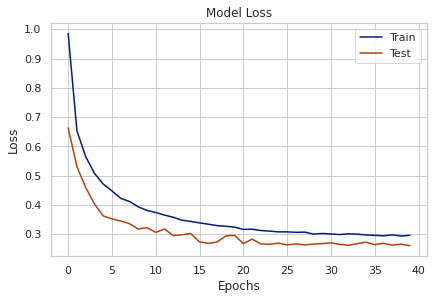

In [31]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'])
plt.show()

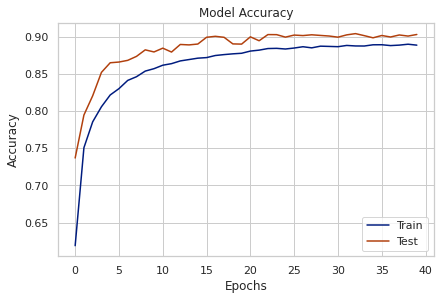

In [32]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Model Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'])
plt.show()

**Kurva Pelatihan dan Validasi sudah dekat, kita dapat menyimpulkan bahwa Model tidak Kelebihan Data.**

# 6) Confusion Matrix

Confusion Matrix digunakan untuk mencari performa dalam memprediksi hasil data dengan data aktual. 

In [33]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

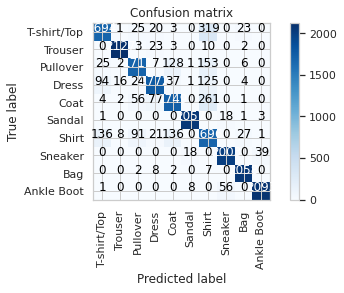

In [34]:
# Predict the values from the validation dataset
Y_pred = model.predict(x_test_pic)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, 
            classes = ['T-shirt/Top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Boot'])

# 7) Visualization of Predicted Classes
## 7.1) Correctly Predicted Classes

Visualisasi hasil data prediksi yang benar dalam sebuah label data berdasarkan kelas.

In [35]:
# Correctly Predicted Classes
correct = []
for i in range(len(y_test)):
    if(Y_pred_classes[i] == Y_true[i]):
        correct.append(i)
    if(len(correct) == 4):
        break

Text(0.5, 1.0, 'Predicted Label : Dress\nActual Label : Dress')

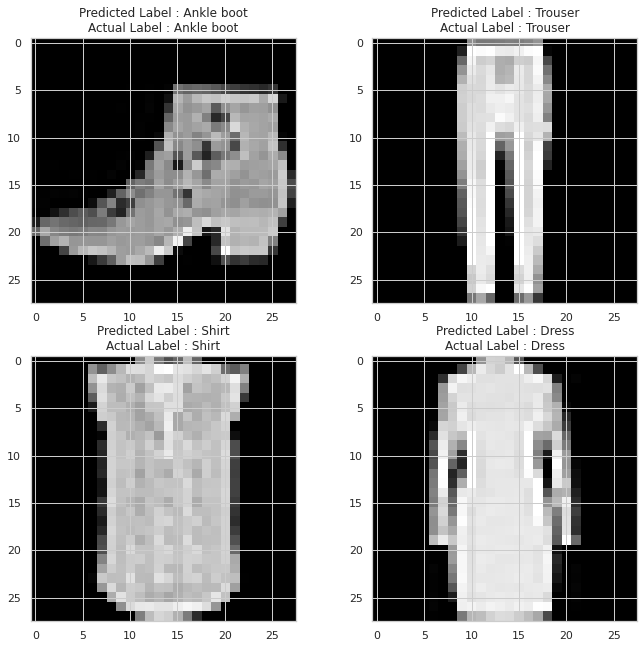

In [36]:
fig, ax = plt.subplots(2,2, figsize=(12,6))
fig.set_size_inches(10,10)
ax[0,0].imshow(x_test[correct[0]].reshape(28,28), cmap='gray')
ax[0,0].set_title("Predicted Label : " + str(labeldict[Y_pred_classes[correct[0]]]) + "\n"+"Actual Label : " + 
                 str(labeldict[Y_true[correct[0]]]))
ax[0,1].imshow(x_test[correct[1]].reshape(28,28), cmap='gray')
ax[0,1].set_title("Predicted Label : " + str(labeldict[Y_pred_classes[correct[1]]]) + "\n"+"Actual Label : " + 
                 str(labeldict[Y_true[correct[1]]]))
ax[1,0].imshow(x_test[correct[2]].reshape(28,28), cmap='gray')
ax[1,0].set_title("Predicted Label : " + str(labeldict[Y_pred_classes[correct[2]]]) + "\n"+"Actual Label : " + 
                 str(labeldict[Y_true[correct[2]]]))
ax[1,1].imshow(x_test[correct[3]].reshape(28,28), cmap='gray')
ax[1,1].set_title("Predicted Label : " + str(labeldict[Y_pred_classes[correct[3]]]) + "\n"+"Actual Label : " + 
                 str(labeldict[Y_true[correct[3]]]))

## 7.2) Incorrectly Predicted Classes

Visualisasi dari hasil prediksi data yang salah dari label data berdasarkan kelas

In [37]:
# Incorrectly Predicted Classes
incorrect = []
for i in range(len(y_test)):
    if(not Y_pred_classes[i] == Y_true[i]):
        incorrect.append(i)
    if(len(incorrect) == 4):
        break

Text(0.5, 1.0, 'Predicted Label : Dress\nActual Label : Coat')

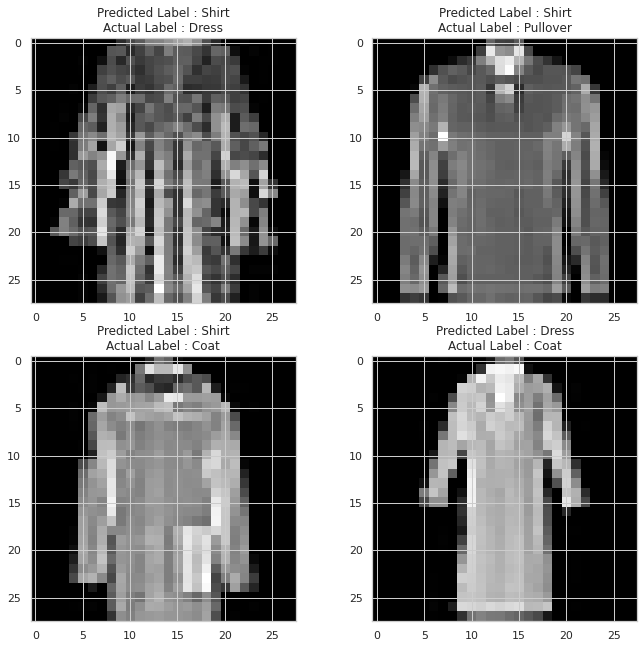

In [38]:
fig, ax = plt.subplots(2,2, figsize=(12,6))
fig.set_size_inches(10,10)
ax[0,0].imshow(x_test[incorrect[0]].reshape(28,28), cmap='gray')
ax[0,0].set_title("Predicted Label : " + str(labeldict[Y_pred_classes[incorrect[0]]]) + "\n"+"Actual Label : " + 
                 str(labeldict[Y_true[incorrect[0]]]))
ax[0,1].imshow(x_test[incorrect[1]].reshape(28,28), cmap='gray')
ax[0,1].set_title("Predicted Label : " + str(labeldict[Y_pred_classes[incorrect[1]]]) + "\n"+"Actual Label : " + 
                 str(labeldict[Y_true[incorrect[1]]]))
ax[1,0].imshow(x_test[incorrect[2]].reshape(28,28), cmap='gray')
ax[1,0].set_title("Predicted Label : " + str(labeldict[Y_pred_classes[incorrect[2]]]) + "\n"+"Actual Label : " + 
                 str(labeldict[Y_true[incorrect[2]]]))
ax[1,1].imshow(x_test[incorrect[3]].reshape(28,28), cmap='gray')
ax[1,1].set_title("Predicted Label : " + str(labeldict[Y_pred_classes[incorrect[3]]]) + "\n"+"Actual Label : " + 
                 str(labeldict[Y_true[incorrect[3]]]))

# 8) Classification Report

Classification Report digunakan untuk menampilkan Presisi, Recall dan F1-Score dan Nilai Support. 

In [39]:
classes = ['T-shirt/Top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Boot']
print(classification_report(Y_true, Y_pred_classes, target_names = classes))

              precision    recall  f1-score   support

 T-shirt/Top       0.87      0.81      0.84      2085
     Trouser       0.99      0.98      0.98      2168
    Pullover       0.89      0.84      0.87      2033
       Dress       0.92      0.85      0.89      2073
        Coat       0.85      0.81      0.83      2150
      Sandal       0.99      0.99      0.99      2080
       Shirt       0.66      0.80      0.72      2116
     Sneaker       0.96      0.97      0.97      2060
         Bag       0.97      0.99      0.98      2077
  Ankle Boot       0.98      0.97      0.97      2158

    accuracy                           0.90     21000
   macro avg       0.91      0.90      0.90     21000
weighted avg       0.91      0.90      0.90     21000



**Lihatlah Presisi shirt, kita dapat melihat bahwa model kami memperkirakan kurang dari 80% Kaos dengan benar dari total gambar yang diprediksi shirt. Kami menyimpulkan hal yang sama dari matriks kebingungan, di mana kami melihat bahwa banyak T-shirt salah diklasifikasikan sebagai T-Shirt.**

# 9) Predicting on the Test Data

Mengevaluasi kinerja model terhadap data test 

In [40]:
# predict on test set
predictions = model.predict(x_test_pic)
print(predictions.shape)

(21000, 10)


In [41]:
X = x_test_pic
Y = y_test

In [42]:
score = model.evaluate(X, Y)

print("Loss: {:.4f}".format(score[0]))
print("Accuracy: {:.4f}".format(score[1]))

657/657 [==============================] - 2s 3ms/step - loss: 0.2611 - accuracy: 0.9029
Loss: 0.2611
Accuracy: 0.9029


# 10.) Rekapitulasi

Rekapitulasi digunakan untuk menampilkan hasil evaluasi model data dengan variansi parameter yang digunakan.

In [43]:
evaluation = pd.DataFrame({'Model': [],
                           'Details':[],
                           'Data_Train': [],
                           'Data_Test': [],
                           'Epochs': [],
                           'Batch_size':[],
                           'Loss': [],
                           'Accuracy': [],
                           'Time_process': []
                           })

In [44]:
r = evaluation.shape[0]
evaluation.loc[r] = ['CNN','-',str(1 - pers_test), str(pers_test), epochs, batch_size,score[0],score[1], sum(cb.logs)]
evaluation

,Model,Details,Data_Train,Data_Test,Epochs,Batch_size,Loss,Accuracy,Time_process
0,CNN,-,0.7,0.3,40.0,150.0,0.261109,0.902857,531.765794


# Recurrent Neural Network

Import Libraries RNN



In [45]:
from keras.models import Model
from keras.layers import Input, Dense, TimeDistributed
from keras.layers import LSTM

Inisialisasi Parameter

Inisialisasi parameter mendefinisikan parameter yang akan digunakan untuk melatih model data.

In [46]:
# Training parameters.
batch_size = 32
num_classes = 10
epochs = 7

# Embedding dimensions.
row_hidden = 128
col_hidden = 128

# Converts class vectors to binary class matrices.
row, col, pixel = x_train_pic.shape[1:]

# 4D input.
x = Input(shape=(row, col, pixel))

Encode Data

Encode Data digunakan untuk mengubah data baris dan kolom menggunakan metode LSTM (Long-Short Time Memory).

In [47]:
# Encodes a row of pixels using TimeDistributed Wrapper.
encoded_rows = TimeDistributed(LSTM(row_hidden))(x)

# Encodes columns of encoded rows.
encoded_columns = LSTM(col_hidden)(encoded_rows)

Membangun Model Data 

In [48]:
# Final predictions and model.
prediction = Dense(num_classes, activation='softmax')(encoded_columns)
model = Model(x, prediction)
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

Melatih Model Data

In [49]:
# Training.
cb = TimingCallback()

model.fit(x_train_pic, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test_pic, y_test),
          callbacks = [reduce_lr, cb])

print(cb.logs)

Epoch 1/7
1532/1532 [==============================] - 17s 11ms/step - loss: 0.7759 - accuracy: 0.7138 - val_loss: 0.4973 - val_accuracy: 0.8169
Epoch 2/7
1532/1532 [==============================] - 16s 11ms/step - loss: 0.4630 - accuracy: 0.8310 - val_loss: 0.3978 - val_accuracy: 0.8556
Epoch 3/7
1532/1532 [==============================] - 16s 11ms/step - loss: 0.3885 - accuracy: 0.8563 - val_loss: 0.3692 - val_accuracy: 0.8642
Epoch 4/7
1532/1532 [==============================] - 16s 11ms/step - loss: 0.3489 - accuracy: 0.8717 - val_loss: 0.3805 - val_accuracy: 0.8606
Epoch 5/7
1532/1532 [==============================] - 16s 11ms/step - loss: 0.3197 - accuracy: 0.8807 - val_loss: 0.3200 - val_accuracy: 0.8818
Epoch 6/7
1532/1532 [==============================] - 16s 11ms/step - loss: 0.2974 - accuracy: 0.8889 - val_loss: 0.3076 - val_accuracy: 0.8869
Epoch 7/7
1532/1532 [==============================] - 16s 11ms/step - loss: 0.2797 - accuracy: 0.8958 - val_loss: 0.4630 - val_ac

In [50]:
print(sum(cb.logs))

117.09036393799943


Evaluasi Data

In [51]:
# Evaluation.
scores = model.evaluate(x_test_pic, y_test, verbose=0)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Test loss: 0.46295225620269775
Test accuracy: 0.8219524025917053


In [52]:
r = evaluation.shape[0]
evaluation.loc[r] = ['RNN','-',str(1 - pers_test), str(pers_test), epochs, batch_size,scores[0],scores[1], sum(cb.logs)]
evaluation

,Model,Details,Data_Train,Data_Test,Epochs,Batch_size,Loss,Accuracy,Time_process
0,CNN,-,0.7,0.3,40.0,150.0,0.261109,0.902857,531.765794
1,RNN,-,0.7,0.3,7.0,32.0,0.462952,0.821952,117.090364


Confusion Matrix

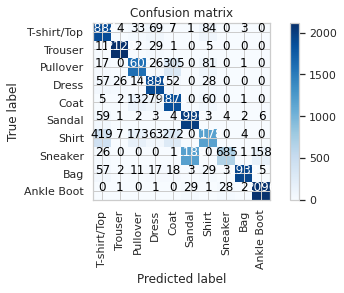

In [53]:
# Predict the values from the validation dataset
Y_pred = model.predict(x_test_pic)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, 
            classes = ['T-shirt/Top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Boot'])

Memasukan hasil dari kinerja model data kedalam CSV dengan Pandas

In [54]:
dict = {"Model" : evaluation.Model, "Details" : evaluation.Details, "Data Train" : evaluation.Data_Train, "Data Test" : evaluation.Data_Test, "Epochs" : evaluation.Epochs, "Batch Size" : evaluation.Batch_size, "Loss" : evaluation.Loss, "Accuracy" : evaluation.Accuracy, "Time Process": evaluation.Time_process}

df = pd.DataFrame(dict)

df.to_csv(r"drive/My Drive/Project/Data/output/hasil_test4.csv", index=False)